# Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

# Todo List
- Add several dense layers after convolutional layers
- Play with learning rate and batch size
- Show single bar chart with different color for truncated keys

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pickle

In [2]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


# Import Data

In [3]:
import os
dataset_dir = 'DataSet/'

In [4]:
count = 0
for filename in os.listdir(dataset_dir):
    if filename.endswith("test_set.pkl") or filename.endswith("predict.pkl") or filename.endswith("debug.pkl"):
        continue
    if filename.endswith(".pkl"): 
        df = pd.read_pickle(os.path.join(dataset_dir, filename))
        
        if count == 0:
            raw_df = df
        else:
            raw_df = raw_df.append(df, ignore_index=True)
            
        print('File: {}, DataSet Length: {}'.format(os.path.join(dataset_dir, filename), len(df)))
        count += 1
    else:
        continue
print('Total Length: {}'.format(len(raw_df)))

File: DataSet/2018-07-13_18-39-56_0.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-43-51_0.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-46-04_1.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-47-58_2.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-49-54_3.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-52-16_4.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-54-29_5.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-56-38_6.pkl, DataSet Length: 500
File: DataSet/2018-07-13_18-58-30_7.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-00-21_8.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-02-36_9.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-04-42_10.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-06-38_11.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-08-49_12.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-10-48_13.pkl, DataSet Length: 500
File: DataSet/2018-07-13_19-12-43_14.pkl, DataSet Length: 500
File: DataSet/2018-

In [5]:
# # Read saved list of data from object into a dataframe
# raw_df = pd.read_pickle('DataSet/data_07-10-18.pkl')
# print(len(raw_df))
# raw_df.head()

In [6]:
data_width = len(raw_df['data'][0])

# Data Preprocessing

#### Filter out key counts less than threshold value

In [7]:
import collections
import matplotlib.pyplot as plt
key_count = collections.Counter(raw_df['key'])

In [8]:
width = 0.5 # Bar width
figsize = (15, 4)

def plot_key_hist(most_common):
    if len(most_common) > 30:
        most_common = most_common[:30]
        
    hist_labels, hist_values = zip(*most_common) # Show only a subset of all keys
    indexes = np.arange(len(hist_labels))
    plt.figure(figsize=figsize)
    plt.bar(indexes, hist_values, width)
    plt.xticks(indexes + width * 0.5, hist_labels, rotation='vertical')
    plt.show()

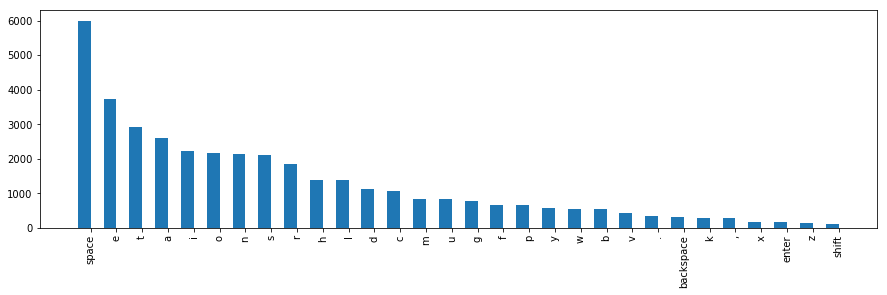

In [9]:
plot_key_hist(key_count.most_common())

In [10]:
key_count.most_common

<bound method Counter.most_common of Counter({'space': 5995, 'e': 3728, 't': 2910, 'a': 2602, 'i': 2241, 'o': 2172, 'n': 2154, 's': 2123, 'r': 1837, 'h': 1385, 'l': 1382, 'd': 1129, 'c': 1067, 'm': 842, 'u': 826, 'g': 777, 'f': 671, 'p': 657, 'y': 563, 'w': 561, 'b': 540, 'v': 440, '.': 335, 'backspace': 320, 'k': 299, ',': 294, 'x': 179, 'enter': 164, 'z': 136, 'shift': 126, "'": 100, 'j': 100, 'q': 90, '0': 73, '-': 62, 'ctrl_l': 60, '1': 47, '2': 47, '9': 39, 'down': 38, 'delete': 38, '3': 26, '5': 21, ';': 18, '/': 18, 'esc': 17, 'left': 16, '8': 15, '7': 15, '4': 14, '6': 14, 'up': 10, 'right': 8, 'tab': 4, '=': 4, '`': 1})>

In [11]:
# Maximize DataSet Size By Finding Optimal Threshold
max_data_size = 0
max_class_cnt = 0
threshold_max = 0
for _, v in key_count.most_common():
    threshold = v - 1
    min_thresh_cnts = [count for key, count in zip(key_count.keys(), key_count.values()) if count > threshold]
    class_cnt = len(min_thresh_cnts)
    data_size = min(min_thresh_cnts)*len(min_thresh_cnts)
    if data_size > max_data_size:
        max_data_size = data_size
        max_class_cnt = class_cnt
        threshold_max = threshold
print('Max Data Size: {}, Class Count: {}, Threshold: {}'.format(max_data_size, max_class_cnt, threshold_max))

Max Data Size: 16984, Class Count: 8, Threshold: 2122


In [12]:
# Manually define threshold
#threshold_max = 2166

In [13]:
# Get list of keys with counts greater than threshold
threshold = threshold_max
min_thresh_keys = [key for key, count in zip(key_count.keys(), key_count.values()) if count > threshold]

# Save list of key classes to pickle
pickle.dump(min_thresh_keys, open(os.path.join(dataset_dir, "key_classes.p"), "wb"))

In [14]:
min_thresh_df = raw_df[raw_df['key'].isin(min_thresh_keys)] # Filter dataframe to only include keys > threshold

In [15]:
def trim_max_thresh(grouped_class):
    return grouped_class.sample(threshold)

In [16]:
# Keep same number of samples in each class by throwing away everything past the threshold
df = min_thresh_df.groupby(['key']).apply(trim_max_thresh)

#### Plot truncated data

In [17]:
truncated_count = collections.Counter(df['key'])

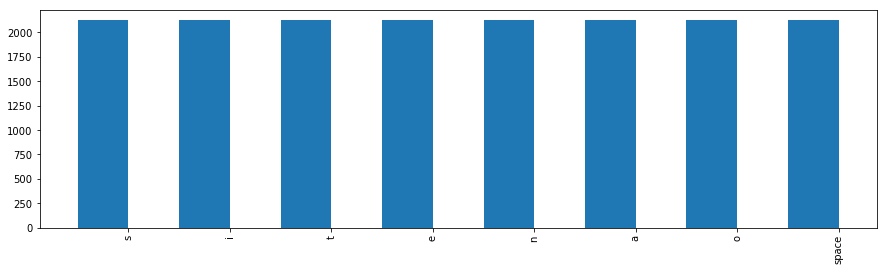

In [18]:
plot_key_hist(truncated_count.most_common())

### Shuffle data

In [19]:
df = df.sample(frac=1).reset_index(drop=True)

### One Hot Encode Classes
<img src="assets/one_hot_encoding.jpg" style="width: 200px;"/>

In [20]:
n_classes = len(set(df['key']))

labels_str = [str(key) for key in df['key']]
lb = preprocessing.LabelBinarizer() # Create encoder
lb.fit(list(set(labels_str)))
labels = lb.transform(labels_str)

In [21]:
lb.classes_

array(['a', 'e', 'i', 'n', 'o', 's', 'space', 't'],
      dtype='<U5')

In [22]:
# Save label set
pickle.dump(lb.classes_, open(os.path.join(dataset_dir, 'labels.p'), "wb"))

### Cross Validation: Training, Validation, and Test Sets

In [23]:
input_data = df['data'].values
input_data = np.stack(input_data, axis=0)

In [24]:
from sklearn.model_selection import train_test_split
train_features, temp_features, train_labels, temp_labels = train_test_split(input_data, labels, test_size=0.45, random_state=42)
test_features, valid_features, test_labels, valid_labels = train_test_split(temp_features, temp_labels, test_size=0.5, random_state=42)

### Normalize Data
Normalization should be performed on the training set. All other test sets should be normalized to parameters fit from the training set's scaler.

#### Normalize Training Set and Fit Scaler

In [25]:
"""
Careful with MinMaxScaler. 
You specifically wan't to use the fit then transform or fit_transform function on the training set only.
On any of the test cross validation sets or prediction data, you DON'T want to fit() or fit_transform().
This would reset the fit of the scaler that we fit with the training set data.
Use the transform() function on the test sets.
"""
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(train_features) # Compute the minimum and maximum to be used for later scaling.
#train_features = scaler.fit_transform(train_features)
train_features = scaler.transform(train_features)

C:\Users\stephen\AppData\Local\conda\conda\envs\tfgpu1.1\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
train_features.shape

(9336, 10240)

In [27]:
# Reshape for 1 channel of audio data
train_features = train_features.reshape((train_features.shape[0], train_features.shape[1], 1))
# labels = labels.reshape((labels.shape[0], labels.shape[1], 1))
train_features.shape

(9336, 10240, 1)

In [28]:
# Save scaler for later scaling on test sets. scaler.fit() saved the min max values
pickle.dump(scaler, open(os.path.join(dataset_dir, 'scaler.p'), "wb"))

#### Normalize Validation Set

In [29]:
valid_features = scaler.transform(valid_features) # Don't use fit_transform() on test sets, use transform()

# Reshape for 1 channel of audio data
valid_features = valid_features.reshape((valid_features.shape[0], valid_features.shape[1], 1))

# Define Network

### Input

In [30]:
def model_inputs(data_width, n_classes):
    """
    Create the model inputs
    :param data_width: The total number of samples in the recorded data point
    :param n_classes: Number of Classes
    :return: Tuple of (tensor of input audio data, key press labels, learning rate, keep_prob)
    """
    # TODO: Add audio channels to input
    
    with tf.name_scope("Inputs"):
        audio_inputs = tf.placeholder(tf.float32, [None, data_width, 1], name='inputs')
    with tf.name_scope("Targets"):
        key_labels = tf.placeholder(tf.float32, [None, n_classes], name='labels')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_probability')

    return audio_inputs, key_labels, learning_rate, keep_prob

### Get Batches

In [31]:
def get_batches(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

### Network

In [32]:
def network(X, keep_prob, n_classes):
    """
    Create the network
    :param X: Tensor of input recording(s)
    :param keep_prob: Tensor for the keep probability
    :param n_classes: Number of Classes
    :return: Tuple of (tensor output of the classifier, tensor logits of the classifier)
    """    
    # Hyperparameters
    alpha = 0.2
    h_dim = 32
    
    #print("X: {}".format(X.shape))
     
    with tf.name_scope("Hidden_Layer1"):
        #h1 = tf.layers.dense(X, h_dim, activation=None)
        h1 = tf.layers.conv1d(X, h_dim, 200, 10, 'same', activation=None)
        h1 = tf.layers.max_pooling1d(h1, 5, 2, 'same')
        h1 = tf.nn.dropout(h1, keep_prob) # Regularization
        h1 = tf.maximum(h1*alpha, h1) # Leaky ReLu
        h1 = tf.layers.batch_normalization(h1)
        
    #print("h1: {}".format(h1.shape))

    with tf.name_scope("Hidden_Layer2"):
        #h2 = tf.layers.dense(h1, h_dim, activation=None)
        h2 = tf.layers.conv1d(h1, h_dim*2, 50, 5, 'same', activation=None)
        #h2 = tf.layers.maxpool2d(h2, 5, 2, 'same')
        h2 = tf.nn.dropout(h2, keep_prob) # Regularization        
        h2 = tf.maximum(h2*alpha, h2) # Leaky ReLu
        h2 = tf.layers.batch_normalization(h2)
        
    #print("h2: {}".format(h2.shape))

    with tf.name_scope("Hidden_Layer3"):
        #h3 = tf.layers.dense(h2, h_dim, activation=None)
        h3 = tf.layers.conv1d(h2, h_dim*3, 20, 2, 'same', activation=None)
        #h3 = tf.layers.maxpool2d(h3, 3, 2, 'same')
        h3 = tf.nn.dropout(h3, keep_prob) # Regularization
        h3 = tf.maximum(h3*alpha, h3) # Leaky ReLu
        h3 = tf.layers.batch_normalization(h3)
        
    with tf.name_scope("Hidden_Layer4"):
        h4 = tf.layers.conv1d(h3, h_dim*4, 10, 1, 'same', activation=None)
        h4 = tf.nn.dropout(h4, keep_prob) # Regularization
        h4 = tf.maximum(h4*alpha, h4) # Leaky ReLu
        h4 = tf.layers.batch_normalization(h4)
    
    
    
    with tf.name_scope("Output"):
        flat_dim = int(h4.get_shape()[1])*int(h4.get_shape()[2])
        flat = tf.reshape(h4, [-1, flat_dim])
        #print("flat: {}".format(flat.shape))
        logits = tf.layers.dense(flat, n_classes, activation=None, name='logits')
        #print("logits: {}".format(logits.shape))
        #out = tf.nn.softmax(logits, name='softmax_out')

    return logits

### Show Stats

In [33]:
def print_stats(session, feature_batch, label_batch, cost, accuracy, esi):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    : esi: Epochs since the last improvement
    """
    with tf.name_scope("Validation_Stats"):
        validation_loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
        validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
        train_accuracy = session.run(accuracy, feed_dict={x: train_features, y: train_labels, keep_prob: 1.0})
        print("Train Accuracy: {0:0.4f}, Validation Accuracy: {1:0.4f}, Validation Loss: {2:0.4f}, ESI: {3}".format(train_accuracy, validation_accuracy, validation_loss, esi))
        return validation_accuracy

### Build Neural Network

In [34]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x, y, learn_rate, keep_prob = model_inputs(data_width, n_classes)

#Model
logits = network(x, keep_prob, n_classes)

with tf.name_scope("Cost"):
    # Cost and Optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name='loss'), name='cost')
    
with tf.name_scope("Train"):
    optimizer = tf.train.AdamOptimizer(learn_rate, name='optimizer').minimize(cost)

with tf.name_scope("Accuracy"):
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1), name='prediction')
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
predicted = tf.nn.softmax(logits, name='predicted')

### Write out the graph for TensorBoard

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter('./logs/2', sess.graph)

### Hyperparameters

In [36]:
epochs = 5000
batch_size = 16
keep_probability = 0.40
learning_rate = 0.0001

# Train Neural Network

In [37]:
# Accuracy to beat (Min of 3 classes)
print("{:.3}%".format((1/n_classes)*100))

12.5%


In [38]:
max_validation_accuracy = 0.0
epochs_since_improvement = 0
saver = tf.train.Saver()
with tf.Session() as sess:
    # Initialize the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        for batch_features, batch_labels in get_batches(train_features, train_labels, batch_size):
            sess.run(optimizer, feed_dict={x: batch_features, 
                                           y: batch_labels, 
                                           learn_rate: learning_rate, 
                                           keep_prob: keep_probability})
        if epoch % 1 == 0:
            print('Epoch {}: '.format(epoch), end='')
            validation_accuracy = print_stats(sess, batch_features, batch_labels, cost, accuracy, epochs_since_improvement)         
        
            if validation_accuracy > max_validation_accuracy:
                max_validation_accuracy = validation_accuracy
                epochs_since_improvement = 0
                saver.save(sess, "checkpoints/model.ckpt")
            else:
                epochs_since_improvement += 1

Epoch 0: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0881, ESI: 0
Epoch 1: Train Accuracy: 0.1249, Validation Accuracy: 0.1283, Validation Loss: 2.0913, ESI: 0
Epoch 2: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0840, ESI: 0
Epoch 3: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0886, ESI: 1
Epoch 4: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0980, ESI: 2
Epoch 5: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0800, ESI: 3
Epoch 6: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0994, ESI: 4
Epoch 7: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0804, ESI: 5
Epoch 8: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0841, ESI: 6
Epoch 9: Train Accuracy: 0.1271, Validation Accuracy: 0.1264, Validation Loss: 2.0846, ESI: 7
Epoch 10: Train Accuracy: 0.1245, Validation Accuracy: 0.128

Epoch 87: Train Accuracy: 0.6053, Validation Accuracy: 0.5395, Validation Loss: 0.9987, ESI: 1
Epoch 88: Train Accuracy: 0.6031, Validation Accuracy: 0.5343, Validation Loss: 0.9291, ESI: 0
Epoch 89: Train Accuracy: 0.6097, Validation Accuracy: 0.5330, Validation Loss: 0.9897, ESI: 1
Epoch 90: Train Accuracy: 0.6096, Validation Accuracy: 0.5377, Validation Loss: 0.9481, ESI: 2
Epoch 91: Train Accuracy: 0.6031, Validation Accuracy: 0.5259, Validation Loss: 1.0611, ESI: 3
Epoch 92: Train Accuracy: 0.6108, Validation Accuracy: 0.5366, Validation Loss: 1.0261, ESI: 4
Epoch 93: Train Accuracy: 0.6173, Validation Accuracy: 0.5304, Validation Loss: 0.9327, ESI: 5
Epoch 94: Train Accuracy: 0.6156, Validation Accuracy: 0.5335, Validation Loss: 0.9794, ESI: 6
Epoch 95: Train Accuracy: 0.6216, Validation Accuracy: 0.5500, Validation Loss: 0.9916, ESI: 7
Epoch 96: Train Accuracy: 0.6056, Validation Accuracy: 0.5335, Validation Loss: 0.9987, ESI: 0
Epoch 97: Train Accuracy: 0.5891, Validation Accur

Epoch 173: Train Accuracy: 0.7164, Validation Accuracy: 0.6058, Validation Loss: 0.7686, ESI: 4
Epoch 174: Train Accuracy: 0.7167, Validation Accuracy: 0.6052, Validation Loss: 0.7433, ESI: 5
Epoch 175: Train Accuracy: 0.7255, Validation Accuracy: 0.6128, Validation Loss: 0.7399, ESI: 6
Epoch 176: Train Accuracy: 0.7151, Validation Accuracy: 0.6076, Validation Loss: 0.7557, ESI: 0
Epoch 177: Train Accuracy: 0.7224, Validation Accuracy: 0.6157, Validation Loss: 0.7655, ESI: 1
Epoch 178: Train Accuracy: 0.7075, Validation Accuracy: 0.6081, Validation Loss: 0.8258, ESI: 0
Epoch 179: Train Accuracy: 0.7199, Validation Accuracy: 0.6162, Validation Loss: 0.7991, ESI: 1
Epoch 180: Train Accuracy: 0.7182, Validation Accuracy: 0.6134, Validation Loss: 0.8298, ESI: 0
Epoch 181: Train Accuracy: 0.7095, Validation Accuracy: 0.6128, Validation Loss: 0.7920, ESI: 1
Epoch 182: Train Accuracy: 0.7187, Validation Accuracy: 0.6052, Validation Loss: 0.7399, ESI: 2
Epoch 183: Train Accuracy: 0.7187, Valid

Epoch 343: Train Accuracy: 0.7934, Validation Accuracy: 0.6623, Validation Loss: 0.6432, ESI: 4
Epoch 344: Train Accuracy: 0.7908, Validation Accuracy: 0.6673, Validation Loss: 0.6280, ESI: 5
Epoch 345: Train Accuracy: 0.7815, Validation Accuracy: 0.6613, Validation Loss: 0.7246, ESI: 6
Epoch 346: Train Accuracy: 0.7752, Validation Accuracy: 0.6537, Validation Loss: 0.6827, ESI: 7
Epoch 347: Train Accuracy: 0.7825, Validation Accuracy: 0.6673, Validation Loss: 0.6760, ESI: 8
Epoch 348: Train Accuracy: 0.7855, Validation Accuracy: 0.6594, Validation Loss: 0.6841, ESI: 9
Epoch 349: Train Accuracy: 0.7875, Validation Accuracy: 0.6649, Validation Loss: 0.6826, ESI: 10
Epoch 350: Train Accuracy: 0.7787, Validation Accuracy: 0.6550, Validation Loss: 0.6983, ESI: 11
Epoch 351: Train Accuracy: 0.7770, Validation Accuracy: 0.6581, Validation Loss: 0.6183, ESI: 12
Epoch 352: Train Accuracy: 0.7781, Validation Accuracy: 0.6584, Validation Loss: 0.7245, ESI: 13
Epoch 353: Train Accuracy: 0.7807, V

Epoch 428: Train Accuracy: 0.7916, Validation Accuracy: 0.6636, Validation Loss: 0.6920, ESI: 7
Epoch 429: Train Accuracy: 0.8021, Validation Accuracy: 0.6728, Validation Loss: 0.6098, ESI: 8
Epoch 430: Train Accuracy: 0.8103, Validation Accuracy: 0.6801, Validation Loss: 0.6547, ESI: 9
Epoch 431: Train Accuracy: 0.7829, Validation Accuracy: 0.6626, Validation Loss: 0.7054, ESI: 10
Epoch 432: Train Accuracy: 0.7993, Validation Accuracy: 0.6728, Validation Loss: 0.6618, ESI: 11
Epoch 433: Train Accuracy: 0.7979, Validation Accuracy: 0.6743, Validation Loss: 0.7154, ESI: 12
Epoch 434: Train Accuracy: 0.7930, Validation Accuracy: 0.6725, Validation Loss: 0.7277, ESI: 13
Epoch 435: Train Accuracy: 0.8023, Validation Accuracy: 0.6762, Validation Loss: 0.7095, ESI: 14
Epoch 436: Train Accuracy: 0.7987, Validation Accuracy: 0.6730, Validation Loss: 0.5954, ESI: 15
Epoch 437: Train Accuracy: 0.8016, Validation Accuracy: 0.6741, Validation Loss: 0.6704, ESI: 16
Epoch 438: Train Accuracy: 0.8126

Epoch 513: Train Accuracy: 0.8212, Validation Accuracy: 0.6898, Validation Loss: 0.5589, ESI: 17
Epoch 514: Train Accuracy: 0.8136, Validation Accuracy: 0.6777, Validation Loss: 0.5885, ESI: 18
Epoch 515: Train Accuracy: 0.8168, Validation Accuracy: 0.6861, Validation Loss: 0.5807, ESI: 19
Epoch 516: Train Accuracy: 0.8218, Validation Accuracy: 0.6887, Validation Loss: 0.5891, ESI: 20
Epoch 517: Train Accuracy: 0.8162, Validation Accuracy: 0.6843, Validation Loss: 0.5747, ESI: 21
Epoch 518: Train Accuracy: 0.8260, Validation Accuracy: 0.6877, Validation Loss: 0.6231, ESI: 22
Epoch 519: Train Accuracy: 0.8161, Validation Accuracy: 0.6872, Validation Loss: 0.6300, ESI: 23
Epoch 520: Train Accuracy: 0.8182, Validation Accuracy: 0.6822, Validation Loss: 0.6261, ESI: 24
Epoch 521: Train Accuracy: 0.8240, Validation Accuracy: 0.6916, Validation Loss: 0.5886, ESI: 25
Epoch 522: Train Accuracy: 0.8160, Validation Accuracy: 0.6848, Validation Loss: 0.6332, ESI: 26
Epoch 523: Train Accuracy: 0.8

Epoch 598: Train Accuracy: 0.8189, Validation Accuracy: 0.6861, Validation Loss: 0.6002, ESI: 13
Epoch 599: Train Accuracy: 0.8220, Validation Accuracy: 0.6901, Validation Loss: 0.5964, ESI: 14
Epoch 600: Train Accuracy: 0.8148, Validation Accuracy: 0.6838, Validation Loss: 0.6025, ESI: 15
Epoch 601: Train Accuracy: 0.8168, Validation Accuracy: 0.6885, Validation Loss: 0.6397, ESI: 16
Epoch 602: Train Accuracy: 0.8190, Validation Accuracy: 0.6872, Validation Loss: 0.5777, ESI: 17
Epoch 603: Train Accuracy: 0.8271, Validation Accuracy: 0.6924, Validation Loss: 0.5715, ESI: 18
Epoch 604: Train Accuracy: 0.8299, Validation Accuracy: 0.6935, Validation Loss: 0.6018, ESI: 19
Epoch 605: Train Accuracy: 0.8350, Validation Accuracy: 0.7010, Validation Loss: 0.5766, ESI: 20
Epoch 606: Train Accuracy: 0.8223, Validation Accuracy: 0.6817, Validation Loss: 0.6516, ESI: 0
Epoch 607: Train Accuracy: 0.8299, Validation Accuracy: 0.6929, Validation Loss: 0.5926, ESI: 1
Epoch 608: Train Accuracy: 0.820

Epoch 683: Train Accuracy: 0.8338, Validation Accuracy: 0.7010, Validation Loss: 0.5982, ESI: 18
Epoch 684: Train Accuracy: 0.8266, Validation Accuracy: 0.6950, Validation Loss: 0.6013, ESI: 19
Epoch 685: Train Accuracy: 0.8424, Validation Accuracy: 0.7000, Validation Loss: 0.5804, ESI: 20
Epoch 686: Train Accuracy: 0.8265, Validation Accuracy: 0.6914, Validation Loss: 0.6398, ESI: 21
Epoch 687: Train Accuracy: 0.8226, Validation Accuracy: 0.6893, Validation Loss: 0.6898, ESI: 22
Epoch 688: Train Accuracy: 0.8259, Validation Accuracy: 0.6906, Validation Loss: 0.6352, ESI: 23
Epoch 689: Train Accuracy: 0.8439, Validation Accuracy: 0.7037, Validation Loss: 0.5778, ESI: 24
Epoch 690: Train Accuracy: 0.8323, Validation Accuracy: 0.6982, Validation Loss: 0.6192, ESI: 25
Epoch 691: Train Accuracy: 0.8374, Validation Accuracy: 0.6976, Validation Loss: 0.5302, ESI: 26
Epoch 692: Train Accuracy: 0.8297, Validation Accuracy: 0.6992, Validation Loss: 0.5618, ESI: 27
Epoch 693: Train Accuracy: 0.8

Epoch 768: Train Accuracy: 0.8464, Validation Accuracy: 0.6963, Validation Loss: 0.5161, ESI: 19
Epoch 769: Train Accuracy: 0.8459, Validation Accuracy: 0.7037, Validation Loss: 0.5132, ESI: 20
Epoch 770: Train Accuracy: 0.8416, Validation Accuracy: 0.7000, Validation Loss: 0.5377, ESI: 21
Epoch 771: Train Accuracy: 0.8416, Validation Accuracy: 0.7094, Validation Loss: 0.5655, ESI: 22
Epoch 772: Train Accuracy: 0.8398, Validation Accuracy: 0.7045, Validation Loss: 0.5709, ESI: 23
Epoch 773: Train Accuracy: 0.8457, Validation Accuracy: 0.7024, Validation Loss: 0.6183, ESI: 24
Epoch 774: Train Accuracy: 0.8481, Validation Accuracy: 0.7120, Validation Loss: 0.4354, ESI: 25
Epoch 775: Train Accuracy: 0.8453, Validation Accuracy: 0.7060, Validation Loss: 0.4425, ESI: 0
Epoch 776: Train Accuracy: 0.8389, Validation Accuracy: 0.7039, Validation Loss: 0.4989, ESI: 1
Epoch 777: Train Accuracy: 0.8422, Validation Accuracy: 0.6992, Validation Loss: 0.5365, ESI: 2
Epoch 778: Train Accuracy: 0.8397

Epoch 853: Train Accuracy: 0.8318, Validation Accuracy: 0.6955, Validation Loss: 0.6799, ESI: 18
Epoch 854: Train Accuracy: 0.8432, Validation Accuracy: 0.7073, Validation Loss: 0.5257, ESI: 19
Epoch 855: Train Accuracy: 0.8629, Validation Accuracy: 0.7183, Validation Loss: 0.5113, ESI: 20
Epoch 856: Train Accuracy: 0.8432, Validation Accuracy: 0.7081, Validation Loss: 0.5757, ESI: 0
Epoch 857: Train Accuracy: 0.8575, Validation Accuracy: 0.7089, Validation Loss: 0.5187, ESI: 1
Epoch 858: Train Accuracy: 0.8523, Validation Accuracy: 0.7107, Validation Loss: 0.5569, ESI: 2
Epoch 859: Train Accuracy: 0.8560, Validation Accuracy: 0.7120, Validation Loss: 0.5244, ESI: 3
Epoch 860: Train Accuracy: 0.8623, Validation Accuracy: 0.7202, Validation Loss: 0.4808, ESI: 4
Epoch 861: Train Accuracy: 0.8431, Validation Accuracy: 0.7050, Validation Loss: 0.5425, ESI: 0
Epoch 862: Train Accuracy: 0.8545, Validation Accuracy: 0.7068, Validation Loss: 0.5740, ESI: 1
Epoch 863: Train Accuracy: 0.8481, Va

Epoch 938: Train Accuracy: 0.8439, Validation Accuracy: 0.7055, Validation Loss: 0.5154, ESI: 77
Epoch 939: Train Accuracy: 0.8587, Validation Accuracy: 0.7092, Validation Loss: 0.4637, ESI: 78
Epoch 940: Train Accuracy: 0.8603, Validation Accuracy: 0.7050, Validation Loss: 0.4990, ESI: 79
Epoch 941: Train Accuracy: 0.8477, Validation Accuracy: 0.7099, Validation Loss: 0.5345, ESI: 80
Epoch 942: Train Accuracy: 0.8530, Validation Accuracy: 0.7118, Validation Loss: 0.4896, ESI: 81
Epoch 943: Train Accuracy: 0.8595, Validation Accuracy: 0.7105, Validation Loss: 0.4871, ESI: 82
Epoch 944: Train Accuracy: 0.8565, Validation Accuracy: 0.7147, Validation Loss: 0.4683, ESI: 83
Epoch 945: Train Accuracy: 0.8427, Validation Accuracy: 0.7084, Validation Loss: 0.5825, ESI: 84
Epoch 946: Train Accuracy: 0.8612, Validation Accuracy: 0.7136, Validation Loss: 0.5246, ESI: 85
Epoch 947: Train Accuracy: 0.8506, Validation Accuracy: 0.7152, Validation Loss: 0.5004, ESI: 86
Epoch 948: Train Accuracy: 0.8

Epoch 1106: Train Accuracy: 0.8582, Validation Accuracy: 0.7147, Validation Loss: 0.5262, ESI: 16
Epoch 1107: Train Accuracy: 0.8477, Validation Accuracy: 0.7089, Validation Loss: 0.5318, ESI: 17
Epoch 1108: Train Accuracy: 0.8521, Validation Accuracy: 0.7136, Validation Loss: 0.4751, ESI: 18
Epoch 1109: Train Accuracy: 0.8533, Validation Accuracy: 0.7076, Validation Loss: 0.5305, ESI: 19
Epoch 1110: Train Accuracy: 0.8691, Validation Accuracy: 0.7233, Validation Loss: 0.4604, ESI: 20
Epoch 1111: Train Accuracy: 0.8686, Validation Accuracy: 0.7217, Validation Loss: 0.4537, ESI: 21
Epoch 1112: Train Accuracy: 0.8608, Validation Accuracy: 0.7152, Validation Loss: 0.4674, ESI: 22
Epoch 1113: Train Accuracy: 0.8554, Validation Accuracy: 0.7152, Validation Loss: 0.4948, ESI: 23
Epoch 1114: Train Accuracy: 0.8709, Validation Accuracy: 0.7183, Validation Loss: 0.4604, ESI: 24
Epoch 1115: Train Accuracy: 0.8668, Validation Accuracy: 0.7147, Validation Loss: 0.4616, ESI: 25
Epoch 1116: Train Ac

Epoch 1190: Train Accuracy: 0.8417, Validation Accuracy: 0.7003, Validation Loss: 0.5598, ESI: 100
Epoch 1191: Train Accuracy: 0.8496, Validation Accuracy: 0.7058, Validation Loss: 0.5181, ESI: 101
Epoch 1192: Train Accuracy: 0.8638, Validation Accuracy: 0.7165, Validation Loss: 0.4955, ESI: 102
Epoch 1193: Train Accuracy: 0.8692, Validation Accuracy: 0.7202, Validation Loss: 0.4062, ESI: 103
Epoch 1194: Train Accuracy: 0.8415, Validation Accuracy: 0.7052, Validation Loss: 0.5654, ESI: 104
Epoch 1195: Train Accuracy: 0.8662, Validation Accuracy: 0.7204, Validation Loss: 0.4949, ESI: 105
Epoch 1196: Train Accuracy: 0.8636, Validation Accuracy: 0.7199, Validation Loss: 0.4769, ESI: 106
Epoch 1197: Train Accuracy: 0.8611, Validation Accuracy: 0.7168, Validation Loss: 0.5117, ESI: 107
Epoch 1198: Train Accuracy: 0.8740, Validation Accuracy: 0.7220, Validation Loss: 0.4634, ESI: 108
Epoch 1199: Train Accuracy: 0.8703, Validation Accuracy: 0.7228, Validation Loss: 0.5326, ESI: 109
Epoch 1200

Epoch 1273: Train Accuracy: 0.8699, Validation Accuracy: 0.7215, Validation Loss: 0.4284, ESI: 13
Epoch 1274: Train Accuracy: 0.8572, Validation Accuracy: 0.7165, Validation Loss: 0.5196, ESI: 14
Epoch 1275: Train Accuracy: 0.8723, Validation Accuracy: 0.7212, Validation Loss: 0.4437, ESI: 15
Epoch 1276: Train Accuracy: 0.8593, Validation Accuracy: 0.7084, Validation Loss: 0.5449, ESI: 16
Epoch 1277: Train Accuracy: 0.8681, Validation Accuracy: 0.7157, Validation Loss: 0.4422, ESI: 17
Epoch 1278: Train Accuracy: 0.8640, Validation Accuracy: 0.7136, Validation Loss: 0.5065, ESI: 18
Epoch 1279: Train Accuracy: 0.8597, Validation Accuracy: 0.7118, Validation Loss: 0.5112, ESI: 19
Epoch 1280: Train Accuracy: 0.8694, Validation Accuracy: 0.7183, Validation Loss: 0.4578, ESI: 20
Epoch 1281: Train Accuracy: 0.8589, Validation Accuracy: 0.7165, Validation Loss: 0.5113, ESI: 21
Epoch 1282: Train Accuracy: 0.8587, Validation Accuracy: 0.7160, Validation Loss: 0.5201, ESI: 22
Epoch 1283: Train Ac

Epoch 1357: Train Accuracy: 0.8761, Validation Accuracy: 0.7285, Validation Loss: 0.3930, ESI: 60
Epoch 1358: Train Accuracy: 0.8768, Validation Accuracy: 0.7293, Validation Loss: 0.3914, ESI: 61
Epoch 1359: Train Accuracy: 0.8649, Validation Accuracy: 0.7212, Validation Loss: 0.5512, ESI: 0
Epoch 1360: Train Accuracy: 0.8665, Validation Accuracy: 0.7181, Validation Loss: 0.4995, ESI: 1
Epoch 1361: Train Accuracy: 0.8674, Validation Accuracy: 0.7223, Validation Loss: 0.4838, ESI: 2
Epoch 1362: Train Accuracy: 0.8642, Validation Accuracy: 0.7162, Validation Loss: 0.5054, ESI: 3
Epoch 1363: Train Accuracy: 0.8638, Validation Accuracy: 0.7165, Validation Loss: 0.5398, ESI: 4
Epoch 1364: Train Accuracy: 0.8620, Validation Accuracy: 0.7212, Validation Loss: 0.4926, ESI: 5
Epoch 1365: Train Accuracy: 0.8594, Validation Accuracy: 0.7160, Validation Loss: 0.5729, ESI: 6
Epoch 1366: Train Accuracy: 0.8538, Validation Accuracy: 0.7105, Validation Loss: 0.5795, ESI: 7
Epoch 1367: Train Accuracy: 

Epoch 1441: Train Accuracy: 0.8671, Validation Accuracy: 0.7212, Validation Loss: 0.4318, ESI: 68
Epoch 1442: Train Accuracy: 0.8695, Validation Accuracy: 0.7246, Validation Loss: 0.4811, ESI: 69
Epoch 1443: Train Accuracy: 0.8767, Validation Accuracy: 0.7259, Validation Loss: 0.4509, ESI: 70
Epoch 1444: Train Accuracy: 0.8777, Validation Accuracy: 0.7246, Validation Loss: 0.4733, ESI: 71
Epoch 1445: Train Accuracy: 0.8741, Validation Accuracy: 0.7249, Validation Loss: 0.4898, ESI: 72
Epoch 1446: Train Accuracy: 0.8753, Validation Accuracy: 0.7223, Validation Loss: 0.4873, ESI: 73
Epoch 1447: Train Accuracy: 0.8771, Validation Accuracy: 0.7209, Validation Loss: 0.4428, ESI: 74
Epoch 1448: Train Accuracy: 0.8766, Validation Accuracy: 0.7241, Validation Loss: 0.5144, ESI: 75
Epoch 1449: Train Accuracy: 0.8702, Validation Accuracy: 0.7217, Validation Loss: 0.4876, ESI: 76
Epoch 1450: Train Accuracy: 0.8743, Validation Accuracy: 0.7262, Validation Loss: 0.4332, ESI: 77
Epoch 1451: Train Ac

Epoch 1525: Train Accuracy: 0.8665, Validation Accuracy: 0.7249, Validation Loss: 0.4065, ESI: 59
Epoch 1526: Train Accuracy: 0.8787, Validation Accuracy: 0.7257, Validation Loss: 0.3839, ESI: 60
Epoch 1527: Train Accuracy: 0.8732, Validation Accuracy: 0.7204, Validation Loss: 0.4446, ESI: 61
Epoch 1528: Train Accuracy: 0.8587, Validation Accuracy: 0.7147, Validation Loss: 0.5074, ESI: 62
Epoch 1529: Train Accuracy: 0.8782, Validation Accuracy: 0.7246, Validation Loss: 0.4260, ESI: 63
Epoch 1530: Train Accuracy: 0.8668, Validation Accuracy: 0.7160, Validation Loss: 0.4780, ESI: 64
Epoch 1531: Train Accuracy: 0.8733, Validation Accuracy: 0.7236, Validation Loss: 0.4014, ESI: 65
Epoch 1532: Train Accuracy: 0.8664, Validation Accuracy: 0.7170, Validation Loss: 0.4661, ESI: 66
Epoch 1533: Train Accuracy: 0.8770, Validation Accuracy: 0.7228, Validation Loss: 0.4475, ESI: 67
Epoch 1534: Train Accuracy: 0.8601, Validation Accuracy: 0.7162, Validation Loss: 0.4979, ESI: 68
Epoch 1535: Train Ac

Epoch 1609: Train Accuracy: 0.8707, Validation Accuracy: 0.7246, Validation Loss: 0.4881, ESI: 36
Epoch 1610: Train Accuracy: 0.8799, Validation Accuracy: 0.7275, Validation Loss: 0.4645, ESI: 37
Epoch 1611: Train Accuracy: 0.8620, Validation Accuracy: 0.7209, Validation Loss: 0.4986, ESI: 38
Epoch 1612: Train Accuracy: 0.8828, Validation Accuracy: 0.7372, Validation Loss: 0.3403, ESI: 39
Epoch 1613: Train Accuracy: 0.8735, Validation Accuracy: 0.7296, Validation Loss: 0.4445, ESI: 0
Epoch 1614: Train Accuracy: 0.8749, Validation Accuracy: 0.7267, Validation Loss: 0.4707, ESI: 1
Epoch 1615: Train Accuracy: 0.8528, Validation Accuracy: 0.7079, Validation Loss: 0.5908, ESI: 2
Epoch 1616: Train Accuracy: 0.8708, Validation Accuracy: 0.7191, Validation Loss: 0.4954, ESI: 3
Epoch 1617: Train Accuracy: 0.8729, Validation Accuracy: 0.7217, Validation Loss: 0.4713, ESI: 4
Epoch 1618: Train Accuracy: 0.8729, Validation Accuracy: 0.7236, Validation Loss: 0.4402, ESI: 5
Epoch 1619: Train Accuracy

Epoch 1693: Train Accuracy: 0.8687, Validation Accuracy: 0.7246, Validation Loss: 0.4465, ESI: 80
Epoch 1694: Train Accuracy: 0.8810, Validation Accuracy: 0.7301, Validation Loss: 0.4604, ESI: 81
Epoch 1695: Train Accuracy: 0.8751, Validation Accuracy: 0.7257, Validation Loss: 0.4637, ESI: 82
Epoch 1696: Train Accuracy: 0.8772, Validation Accuracy: 0.7288, Validation Loss: 0.3989, ESI: 83
Epoch 1697: Train Accuracy: 0.8781, Validation Accuracy: 0.7301, Validation Loss: 0.3957, ESI: 84
Epoch 1698: Train Accuracy: 0.8695, Validation Accuracy: 0.7241, Validation Loss: 0.4769, ESI: 85
Epoch 1699: Train Accuracy: 0.8695, Validation Accuracy: 0.7249, Validation Loss: 0.4534, ESI: 86
Epoch 1700: Train Accuracy: 0.8847, Validation Accuracy: 0.7309, Validation Loss: 0.4180, ESI: 87
Epoch 1701: Train Accuracy: 0.8747, Validation Accuracy: 0.7233, Validation Loss: 0.4460, ESI: 88
Epoch 1702: Train Accuracy: 0.8822, Validation Accuracy: 0.7309, Validation Loss: 0.4309, ESI: 89
Epoch 1703: Train Ac

Epoch 1777: Train Accuracy: 0.8704, Validation Accuracy: 0.7215, Validation Loss: 0.5025, ESI: 67
Epoch 1778: Train Accuracy: 0.8793, Validation Accuracy: 0.7351, Validation Loss: 0.4516, ESI: 68
Epoch 1779: Train Accuracy: 0.8826, Validation Accuracy: 0.7338, Validation Loss: 0.4577, ESI: 69
Epoch 1780: Train Accuracy: 0.8798, Validation Accuracy: 0.7356, Validation Loss: 0.4396, ESI: 70
Epoch 1781: Train Accuracy: 0.8762, Validation Accuracy: 0.7254, Validation Loss: 0.4391, ESI: 71
Epoch 1782: Train Accuracy: 0.8745, Validation Accuracy: 0.7314, Validation Loss: 0.4124, ESI: 72
Epoch 1783: Train Accuracy: 0.8748, Validation Accuracy: 0.7283, Validation Loss: 0.4788, ESI: 73
Epoch 1784: Train Accuracy: 0.8655, Validation Accuracy: 0.7246, Validation Loss: 0.4902, ESI: 74
Epoch 1785: Train Accuracy: 0.8792, Validation Accuracy: 0.7338, Validation Loss: 0.4172, ESI: 75
Epoch 1786: Train Accuracy: 0.8452, Validation Accuracy: 0.7102, Validation Loss: 0.5077, ESI: 76
Epoch 1787: Train Ac

Epoch 1861: Train Accuracy: 0.8735, Validation Accuracy: 0.7304, Validation Loss: 0.4181, ESI: 11
Epoch 1862: Train Accuracy: 0.8735, Validation Accuracy: 0.7309, Validation Loss: 0.4372, ESI: 12
Epoch 1863: Train Accuracy: 0.8600, Validation Accuracy: 0.7215, Validation Loss: 0.4307, ESI: 13
Epoch 1864: Train Accuracy: 0.8794, Validation Accuracy: 0.7312, Validation Loss: 0.4125, ESI: 14
Epoch 1865: Train Accuracy: 0.8872, Validation Accuracy: 0.7306, Validation Loss: 0.3622, ESI: 15
Epoch 1866: Train Accuracy: 0.8739, Validation Accuracy: 0.7288, Validation Loss: 0.4410, ESI: 16
Epoch 1867: Train Accuracy: 0.8849, Validation Accuracy: 0.7356, Validation Loss: 0.3998, ESI: 17
Epoch 1868: Train Accuracy: 0.8695, Validation Accuracy: 0.7314, Validation Loss: 0.4142, ESI: 18
Epoch 1869: Train Accuracy: 0.8718, Validation Accuracy: 0.7296, Validation Loss: 0.4543, ESI: 19
Epoch 1870: Train Accuracy: 0.8691, Validation Accuracy: 0.7249, Validation Loss: 0.4701, ESI: 20
Epoch 1871: Train Ac

Epoch 1945: Train Accuracy: 0.8741, Validation Accuracy: 0.7312, Validation Loss: 0.4366, ESI: 95
Epoch 1946: Train Accuracy: 0.8857, Validation Accuracy: 0.7406, Validation Loss: 0.4196, ESI: 96
Epoch 1947: Train Accuracy: 0.8856, Validation Accuracy: 0.7369, Validation Loss: 0.4370, ESI: 0
Epoch 1948: Train Accuracy: 0.8829, Validation Accuracy: 0.7387, Validation Loss: 0.4319, ESI: 1
Epoch 1949: Train Accuracy: 0.8756, Validation Accuracy: 0.7298, Validation Loss: 0.4887, ESI: 2
Epoch 1950: Train Accuracy: 0.8830, Validation Accuracy: 0.7259, Validation Loss: 0.3851, ESI: 3
Epoch 1951: Train Accuracy: 0.8819, Validation Accuracy: 0.7327, Validation Loss: 0.3925, ESI: 4
Epoch 1952: Train Accuracy: 0.8771, Validation Accuracy: 0.7275, Validation Loss: 0.4543, ESI: 5
Epoch 1953: Train Accuracy: 0.8778, Validation Accuracy: 0.7312, Validation Loss: 0.4466, ESI: 6
Epoch 1954: Train Accuracy: 0.8836, Validation Accuracy: 0.7317, Validation Loss: 0.4216, ESI: 7
Epoch 1955: Train Accuracy: 

Epoch 2029: Train Accuracy: 0.8756, Validation Accuracy: 0.7275, Validation Loss: 0.4189, ESI: 82
Epoch 2030: Train Accuracy: 0.8707, Validation Accuracy: 0.7272, Validation Loss: 0.4649, ESI: 83
Epoch 2031: Train Accuracy: 0.8830, Validation Accuracy: 0.7262, Validation Loss: 0.4392, ESI: 84
Epoch 2032: Train Accuracy: 0.8690, Validation Accuracy: 0.7243, Validation Loss: 0.5158, ESI: 85
Epoch 2033: Train Accuracy: 0.8877, Validation Accuracy: 0.7314, Validation Loss: 0.3871, ESI: 86
Epoch 2034: Train Accuracy: 0.8835, Validation Accuracy: 0.7322, Validation Loss: 0.4296, ESI: 87
Epoch 2035: Train Accuracy: 0.8821, Validation Accuracy: 0.7301, Validation Loss: 0.4490, ESI: 88
Epoch 2036: Train Accuracy: 0.8909, Validation Accuracy: 0.7361, Validation Loss: 0.4323, ESI: 89
Epoch 2037: Train Accuracy: 0.8693, Validation Accuracy: 0.7233, Validation Loss: 0.5630, ESI: 90
Epoch 2038: Train Accuracy: 0.8776, Validation Accuracy: 0.7285, Validation Loss: 0.4776, ESI: 91
Epoch 2039: Train Ac

Epoch 2113: Train Accuracy: 0.8850, Validation Accuracy: 0.7369, Validation Loss: 0.4580, ESI: 1
Epoch 2114: Train Accuracy: 0.8689, Validation Accuracy: 0.7243, Validation Loss: 0.4960, ESI: 2
Epoch 2115: Train Accuracy: 0.8736, Validation Accuracy: 0.7277, Validation Loss: 0.4496, ESI: 3
Epoch 2116: Train Accuracy: 0.8844, Validation Accuracy: 0.7340, Validation Loss: 0.4435, ESI: 4
Epoch 2117: Train Accuracy: 0.8854, Validation Accuracy: 0.7387, Validation Loss: 0.4789, ESI: 5
Epoch 2118: Train Accuracy: 0.8709, Validation Accuracy: 0.7288, Validation Loss: 0.5191, ESI: 6
Epoch 2119: Train Accuracy: 0.8851, Validation Accuracy: 0.7374, Validation Loss: 0.4388, ESI: 7
Epoch 2120: Train Accuracy: 0.8905, Validation Accuracy: 0.7338, Validation Loss: 0.4201, ESI: 8
Epoch 2121: Train Accuracy: 0.8946, Validation Accuracy: 0.7416, Validation Loss: 0.3175, ESI: 9
Epoch 2122: Train Accuracy: 0.8806, Validation Accuracy: 0.7327, Validation Loss: 0.4875, ESI: 10
Epoch 2123: Train Accuracy: 0

Epoch 2197: Train Accuracy: 0.8942, Validation Accuracy: 0.7429, Validation Loss: 0.3971, ESI: 3
Epoch 2198: Train Accuracy: 0.8844, Validation Accuracy: 0.7380, Validation Loss: 0.3923, ESI: 4
Epoch 2199: Train Accuracy: 0.8737, Validation Accuracy: 0.7291, Validation Loss: 0.4564, ESI: 5
Epoch 2200: Train Accuracy: 0.8933, Validation Accuracy: 0.7442, Validation Loss: 0.3638, ESI: 6
Epoch 2201: Train Accuracy: 0.8909, Validation Accuracy: 0.7348, Validation Loss: 0.3882, ESI: 7
Epoch 2202: Train Accuracy: 0.8851, Validation Accuracy: 0.7382, Validation Loss: 0.3769, ESI: 8
Epoch 2203: Train Accuracy: 0.8839, Validation Accuracy: 0.7351, Validation Loss: 0.4121, ESI: 9
Epoch 2204: Train Accuracy: 0.8876, Validation Accuracy: 0.7408, Validation Loss: 0.3996, ESI: 10
Epoch 2205: Train Accuracy: 0.8689, Validation Accuracy: 0.7264, Validation Loss: 0.4805, ESI: 11
Epoch 2206: Train Accuracy: 0.8932, Validation Accuracy: 0.7461, Validation Loss: 0.3620, ESI: 12
Epoch 2207: Train Accuracy:

Epoch 2281: Train Accuracy: 0.8741, Validation Accuracy: 0.7246, Validation Loss: 0.4993, ESI: 87
Epoch 2282: Train Accuracy: 0.8797, Validation Accuracy: 0.7312, Validation Loss: 0.5052, ESI: 88
Epoch 2283: Train Accuracy: 0.8864, Validation Accuracy: 0.7387, Validation Loss: 0.4699, ESI: 89
Epoch 2284: Train Accuracy: 0.8847, Validation Accuracy: 0.7361, Validation Loss: 0.4539, ESI: 90
Epoch 2285: Train Accuracy: 0.9011, Validation Accuracy: 0.7474, Validation Loss: 0.3760, ESI: 91
Epoch 2286: Train Accuracy: 0.8921, Validation Accuracy: 0.7408, Validation Loss: 0.4202, ESI: 92
Epoch 2287: Train Accuracy: 0.8869, Validation Accuracy: 0.7332, Validation Loss: 0.3660, ESI: 93
Epoch 2288: Train Accuracy: 0.8890, Validation Accuracy: 0.7406, Validation Loss: 0.3791, ESI: 94
Epoch 2289: Train Accuracy: 0.8847, Validation Accuracy: 0.7382, Validation Loss: 0.4689, ESI: 95
Epoch 2290: Train Accuracy: 0.8854, Validation Accuracy: 0.7395, Validation Loss: 0.4058, ESI: 96
Epoch 2291: Train Ac

Epoch 2364: Train Accuracy: 0.8907, Validation Accuracy: 0.7390, Validation Loss: 0.3921, ESI: 170
Epoch 2365: Train Accuracy: 0.8830, Validation Accuracy: 0.7366, Validation Loss: 0.4181, ESI: 171
Epoch 2366: Train Accuracy: 0.8930, Validation Accuracy: 0.7403, Validation Loss: 0.3717, ESI: 172
Epoch 2367: Train Accuracy: 0.8881, Validation Accuracy: 0.7458, Validation Loss: 0.4094, ESI: 173
Epoch 2368: Train Accuracy: 0.8851, Validation Accuracy: 0.7348, Validation Loss: 0.3796, ESI: 174
Epoch 2369: Train Accuracy: 0.8835, Validation Accuracy: 0.7387, Validation Loss: 0.3963, ESI: 175
Epoch 2370: Train Accuracy: 0.8924, Validation Accuracy: 0.7395, Validation Loss: 0.3975, ESI: 176
Epoch 2371: Train Accuracy: 0.8981, Validation Accuracy: 0.7403, Validation Loss: 0.3467, ESI: 177
Epoch 2372: Train Accuracy: 0.8888, Validation Accuracy: 0.7332, Validation Loss: 0.4480, ESI: 178
Epoch 2373: Train Accuracy: 0.8906, Validation Accuracy: 0.7374, Validation Loss: 0.4409, ESI: 179
Epoch 2374

Epoch 2447: Train Accuracy: 0.8910, Validation Accuracy: 0.7406, Validation Loss: 0.3794, ESI: 253
Epoch 2448: Train Accuracy: 0.8929, Validation Accuracy: 0.7372, Validation Loss: 0.3600, ESI: 254
Epoch 2449: Train Accuracy: 0.8910, Validation Accuracy: 0.7403, Validation Loss: 0.3832, ESI: 255
Epoch 2450: Train Accuracy: 0.8917, Validation Accuracy: 0.7450, Validation Loss: 0.3721, ESI: 256
Epoch 2451: Train Accuracy: 0.8929, Validation Accuracy: 0.7440, Validation Loss: 0.4086, ESI: 257
Epoch 2452: Train Accuracy: 0.8885, Validation Accuracy: 0.7398, Validation Loss: 0.3959, ESI: 258
Epoch 2453: Train Accuracy: 0.8918, Validation Accuracy: 0.7429, Validation Loss: 0.3625, ESI: 259
Epoch 2454: Train Accuracy: 0.8849, Validation Accuracy: 0.7414, Validation Loss: 0.4009, ESI: 260
Epoch 2455: Train Accuracy: 0.8834, Validation Accuracy: 0.7398, Validation Loss: 0.4876, ESI: 261
Epoch 2456: Train Accuracy: 0.8874, Validation Accuracy: 0.7421, Validation Loss: 0.4121, ESI: 262
Epoch 2457

Epoch 2614: Train Accuracy: 0.8932, Validation Accuracy: 0.7382, Validation Loss: 0.3561, ESI: 68
Epoch 2615: Train Accuracy: 0.9006, Validation Accuracy: 0.7442, Validation Loss: 0.3398, ESI: 69
Epoch 2616: Train Accuracy: 0.8761, Validation Accuracy: 0.7343, Validation Loss: 0.4708, ESI: 70
Epoch 2617: Train Accuracy: 0.8916, Validation Accuracy: 0.7393, Validation Loss: 0.3968, ESI: 71
Epoch 2618: Train Accuracy: 0.8821, Validation Accuracy: 0.7317, Validation Loss: 0.4323, ESI: 72
Epoch 2619: Train Accuracy: 0.8969, Validation Accuracy: 0.7435, Validation Loss: 0.3486, ESI: 73
Epoch 2620: Train Accuracy: 0.8950, Validation Accuracy: 0.7442, Validation Loss: 0.3538, ESI: 74
Epoch 2621: Train Accuracy: 0.8861, Validation Accuracy: 0.7374, Validation Loss: 0.4106, ESI: 75
Epoch 2622: Train Accuracy: 0.8916, Validation Accuracy: 0.7408, Validation Loss: 0.3953, ESI: 76
Epoch 2623: Train Accuracy: 0.8918, Validation Accuracy: 0.7377, Validation Loss: 0.3870, ESI: 77
Epoch 2624: Train Ac

Epoch 2780: Train Accuracy: 0.8896, Validation Accuracy: 0.7385, Validation Loss: 0.4068, ESI: 234
Epoch 2781: Train Accuracy: 0.8943, Validation Accuracy: 0.7419, Validation Loss: 0.3954, ESI: 235
Epoch 2782: Train Accuracy: 0.8963, Validation Accuracy: 0.7390, Validation Loss: 0.3560, ESI: 236
Epoch 2783: Train Accuracy: 0.8816, Validation Accuracy: 0.7340, Validation Loss: 0.4266, ESI: 237
Epoch 2784: Train Accuracy: 0.8890, Validation Accuracy: 0.7411, Validation Loss: 0.4113, ESI: 238
Epoch 2785: Train Accuracy: 0.8918, Validation Accuracy: 0.7419, Validation Loss: 0.3894, ESI: 239
Epoch 2786: Train Accuracy: 0.8789, Validation Accuracy: 0.7356, Validation Loss: 0.4733, ESI: 240
Epoch 2787: Train Accuracy: 0.8936, Validation Accuracy: 0.7416, Validation Loss: 0.3863, ESI: 241
Epoch 2788: Train Accuracy: 0.8904, Validation Accuracy: 0.7380, Validation Loss: 0.3711, ESI: 242
Epoch 2789: Train Accuracy: 0.8790, Validation Accuracy: 0.7309, Validation Loss: 0.4092, ESI: 243
Epoch 2790

Epoch 2863: Train Accuracy: 0.9032, Validation Accuracy: 0.7495, Validation Loss: 0.3774, ESI: 8
Epoch 2864: Train Accuracy: 0.8987, Validation Accuracy: 0.7450, Validation Loss: 0.3108, ESI: 9
Epoch 2865: Train Accuracy: 0.8812, Validation Accuracy: 0.7325, Validation Loss: 0.4755, ESI: 10
Epoch 2866: Train Accuracy: 0.8879, Validation Accuracy: 0.7385, Validation Loss: 0.4082, ESI: 11
Epoch 2867: Train Accuracy: 0.9033, Validation Accuracy: 0.7510, Validation Loss: 0.3736, ESI: 12
Epoch 2868: Train Accuracy: 0.8917, Validation Accuracy: 0.7427, Validation Loss: 0.3877, ESI: 13
Epoch 2869: Train Accuracy: 0.8981, Validation Accuracy: 0.7455, Validation Loss: 0.3429, ESI: 14
Epoch 2870: Train Accuracy: 0.8924, Validation Accuracy: 0.7442, Validation Loss: 0.3698, ESI: 15
Epoch 2871: Train Accuracy: 0.8989, Validation Accuracy: 0.7471, Validation Loss: 0.3987, ESI: 16
Epoch 2872: Train Accuracy: 0.8957, Validation Accuracy: 0.7424, Validation Loss: 0.3526, ESI: 17
Epoch 2873: Train Accu

Epoch 2947: Train Accuracy: 0.8999, Validation Accuracy: 0.7529, Validation Loss: 0.3411, ESI: 92
Epoch 2948: Train Accuracy: 0.8943, Validation Accuracy: 0.7408, Validation Loss: 0.3990, ESI: 93
Epoch 2949: Train Accuracy: 0.8993, Validation Accuracy: 0.7421, Validation Loss: 0.3593, ESI: 94
Epoch 2950: Train Accuracy: 0.8980, Validation Accuracy: 0.7403, Validation Loss: 0.3399, ESI: 95
Epoch 2951: Train Accuracy: 0.8939, Validation Accuracy: 0.7490, Validation Loss: 0.3594, ESI: 96
Epoch 2952: Train Accuracy: 0.8922, Validation Accuracy: 0.7437, Validation Loss: 0.3569, ESI: 97
Epoch 2953: Train Accuracy: 0.8958, Validation Accuracy: 0.7401, Validation Loss: 0.3743, ESI: 98
Epoch 2954: Train Accuracy: 0.8865, Validation Accuracy: 0.7380, Validation Loss: 0.4257, ESI: 99
Epoch 2955: Train Accuracy: 0.8999, Validation Accuracy: 0.7455, Validation Loss: 0.3690, ESI: 100
Epoch 2956: Train Accuracy: 0.8949, Validation Accuracy: 0.7390, Validation Loss: 0.3903, ESI: 101
Epoch 2957: Train 

Epoch 3030: Train Accuracy: 0.8861, Validation Accuracy: 0.7361, Validation Loss: 0.3809, ESI: 175
Epoch 3031: Train Accuracy: 0.8926, Validation Accuracy: 0.7419, Validation Loss: 0.3807, ESI: 176
Epoch 3032: Train Accuracy: 0.9047, Validation Accuracy: 0.7518, Validation Loss: 0.3347, ESI: 177
Epoch 3033: Train Accuracy: 0.9022, Validation Accuracy: 0.7497, Validation Loss: 0.3712, ESI: 178
Epoch 3034: Train Accuracy: 0.8961, Validation Accuracy: 0.7435, Validation Loss: 0.3811, ESI: 179
Epoch 3035: Train Accuracy: 0.8957, Validation Accuracy: 0.7455, Validation Loss: 0.3703, ESI: 180
Epoch 3036: Train Accuracy: 0.8951, Validation Accuracy: 0.7474, Validation Loss: 0.3489, ESI: 181
Epoch 3037: Train Accuracy: 0.8934, Validation Accuracy: 0.7393, Validation Loss: 0.3874, ESI: 182
Epoch 3038: Train Accuracy: 0.8890, Validation Accuracy: 0.7448, Validation Loss: 0.4229, ESI: 183
Epoch 3039: Train Accuracy: 0.8996, Validation Accuracy: 0.7500, Validation Loss: 0.3606, ESI: 184
Epoch 3040

Epoch 3114: Train Accuracy: 0.8926, Validation Accuracy: 0.7380, Validation Loss: 0.3547, ESI: 62
Epoch 3115: Train Accuracy: 0.8935, Validation Accuracy: 0.7482, Validation Loss: 0.3696, ESI: 63
Epoch 3116: Train Accuracy: 0.9001, Validation Accuracy: 0.7453, Validation Loss: 0.3667, ESI: 64
Epoch 3117: Train Accuracy: 0.8917, Validation Accuracy: 0.7401, Validation Loss: 0.3560, ESI: 65
Epoch 3118: Train Accuracy: 0.8887, Validation Accuracy: 0.7351, Validation Loss: 0.3734, ESI: 66
Epoch 3119: Train Accuracy: 0.9007, Validation Accuracy: 0.7469, Validation Loss: 0.3219, ESI: 67
Epoch 3120: Train Accuracy: 0.8934, Validation Accuracy: 0.7382, Validation Loss: 0.2875, ESI: 68
Epoch 3121: Train Accuracy: 0.8913, Validation Accuracy: 0.7346, Validation Loss: 0.3492, ESI: 69
Epoch 3122: Train Accuracy: 0.8885, Validation Accuracy: 0.7377, Validation Loss: 0.3960, ESI: 70
Epoch 3123: Train Accuracy: 0.8975, Validation Accuracy: 0.7406, Validation Loss: 0.3709, ESI: 71
Epoch 3124: Train Ac

Epoch 3198: Train Accuracy: 0.8981, Validation Accuracy: 0.7479, Validation Loss: 0.3901, ESI: 146
Epoch 3199: Train Accuracy: 0.8936, Validation Accuracy: 0.7440, Validation Loss: 0.3625, ESI: 147
Epoch 3200: Train Accuracy: 0.8972, Validation Accuracy: 0.7437, Validation Loss: 0.3369, ESI: 148
Epoch 3201: Train Accuracy: 0.8937, Validation Accuracy: 0.7479, Validation Loss: 0.3845, ESI: 149
Epoch 3202: Train Accuracy: 0.8912, Validation Accuracy: 0.7463, Validation Loss: 0.3974, ESI: 150
Epoch 3203: Train Accuracy: 0.9096, Validation Accuracy: 0.7526, Validation Loss: 0.3234, ESI: 151
Epoch 3204: Train Accuracy: 0.9052, Validation Accuracy: 0.7484, Validation Loss: 0.3349, ESI: 152
Epoch 3205: Train Accuracy: 0.9007, Validation Accuracy: 0.7513, Validation Loss: 0.3341, ESI: 153
Epoch 3206: Train Accuracy: 0.9030, Validation Accuracy: 0.7476, Validation Loss: 0.3552, ESI: 154
Epoch 3207: Train Accuracy: 0.8995, Validation Accuracy: 0.7419, Validation Loss: 0.2934, ESI: 155
Epoch 3208

Epoch 3282: Train Accuracy: 0.8955, Validation Accuracy: 0.7463, Validation Loss: 0.3779, ESI: 5
Epoch 3283: Train Accuracy: 0.8888, Validation Accuracy: 0.7445, Validation Loss: 0.3658, ESI: 6
Epoch 3284: Train Accuracy: 0.8994, Validation Accuracy: 0.7513, Validation Loss: 0.3541, ESI: 7
Epoch 3285: Train Accuracy: 0.8911, Validation Accuracy: 0.7414, Validation Loss: 0.4015, ESI: 8
Epoch 3286: Train Accuracy: 0.8895, Validation Accuracy: 0.7416, Validation Loss: 0.4039, ESI: 9
Epoch 3287: Train Accuracy: 0.9043, Validation Accuracy: 0.7526, Validation Loss: 0.3773, ESI: 10
Epoch 3288: Train Accuracy: 0.9021, Validation Accuracy: 0.7490, Validation Loss: 0.3940, ESI: 11
Epoch 3289: Train Accuracy: 0.9022, Validation Accuracy: 0.7474, Validation Loss: 0.3084, ESI: 12
Epoch 3290: Train Accuracy: 0.8996, Validation Accuracy: 0.7445, Validation Loss: 0.3631, ESI: 13
Epoch 3291: Train Accuracy: 0.8980, Validation Accuracy: 0.7484, Validation Loss: 0.4142, ESI: 14
Epoch 3292: Train Accurac

Epoch 3366: Train Accuracy: 0.8918, Validation Accuracy: 0.7479, Validation Loss: 0.4284, ESI: 89
Epoch 3367: Train Accuracy: 0.9017, Validation Accuracy: 0.7482, Validation Loss: 0.3421, ESI: 90
Epoch 3368: Train Accuracy: 0.9020, Validation Accuracy: 0.7518, Validation Loss: 0.3075, ESI: 91
Epoch 3369: Train Accuracy: 0.8941, Validation Accuracy: 0.7419, Validation Loss: 0.3813, ESI: 92
Epoch 3370: Train Accuracy: 0.8954, Validation Accuracy: 0.7448, Validation Loss: 0.3529, ESI: 93
Epoch 3371: Train Accuracy: 0.8997, Validation Accuracy: 0.7450, Validation Loss: 0.3208, ESI: 94
Epoch 3372: Train Accuracy: 0.8924, Validation Accuracy: 0.7408, Validation Loss: 0.3729, ESI: 95
Epoch 3373: Train Accuracy: 0.9037, Validation Accuracy: 0.7500, Validation Loss: 0.3617, ESI: 96
Epoch 3374: Train Accuracy: 0.9055, Validation Accuracy: 0.7503, Validation Loss: 0.4011, ESI: 97
Epoch 3375: Train Accuracy: 0.9118, Validation Accuracy: 0.7550, Validation Loss: 0.3396, ESI: 98
Epoch 3376: Train Ac

Epoch 3450: Train Accuracy: 0.8954, Validation Accuracy: 0.7440, Validation Loss: 0.3384, ESI: 19
Epoch 3451: Train Accuracy: 0.8972, Validation Accuracy: 0.7461, Validation Loss: 0.3765, ESI: 20
Epoch 3452: Train Accuracy: 0.8861, Validation Accuracy: 0.7382, Validation Loss: 0.3930, ESI: 21
Epoch 3453: Train Accuracy: 0.8980, Validation Accuracy: 0.7463, Validation Loss: 0.3822, ESI: 22
Epoch 3454: Train Accuracy: 0.9025, Validation Accuracy: 0.7469, Validation Loss: 0.2928, ESI: 23
Epoch 3455: Train Accuracy: 0.9068, Validation Accuracy: 0.7487, Validation Loss: 0.2851, ESI: 24
Epoch 3456: Train Accuracy: 0.9071, Validation Accuracy: 0.7524, Validation Loss: 0.3500, ESI: 25
Epoch 3457: Train Accuracy: 0.9012, Validation Accuracy: 0.7487, Validation Loss: 0.3628, ESI: 26
Epoch 3458: Train Accuracy: 0.9002, Validation Accuracy: 0.7476, Validation Loss: 0.3310, ESI: 27
Epoch 3459: Train Accuracy: 0.9107, Validation Accuracy: 0.7558, Validation Loss: 0.3106, ESI: 28
Epoch 3460: Train Ac

Epoch 3534: Train Accuracy: 0.8996, Validation Accuracy: 0.7442, Validation Loss: 0.3927, ESI: 103
Epoch 3535: Train Accuracy: 0.9040, Validation Accuracy: 0.7484, Validation Loss: 0.3430, ESI: 104
Epoch 3536: Train Accuracy: 0.9087, Validation Accuracy: 0.7518, Validation Loss: 0.3122, ESI: 105
Epoch 3537: Train Accuracy: 0.8785, Validation Accuracy: 0.7340, Validation Loss: 0.4495, ESI: 106
Epoch 3538: Train Accuracy: 0.9008, Validation Accuracy: 0.7476, Validation Loss: 0.3546, ESI: 107
Epoch 3539: Train Accuracy: 0.8971, Validation Accuracy: 0.7424, Validation Loss: 0.3669, ESI: 108
Epoch 3540: Train Accuracy: 0.9045, Validation Accuracy: 0.7503, Validation Loss: 0.3308, ESI: 109
Epoch 3541: Train Accuracy: 0.8967, Validation Accuracy: 0.7455, Validation Loss: 0.3829, ESI: 110
Epoch 3542: Train Accuracy: 0.9003, Validation Accuracy: 0.7545, Validation Loss: 0.3642, ESI: 111
Epoch 3543: Train Accuracy: 0.8991, Validation Accuracy: 0.7469, Validation Loss: 0.3607, ESI: 112
Epoch 3544

Epoch 3617: Train Accuracy: 0.9026, Validation Accuracy: 0.7531, Validation Loss: 0.3419, ESI: 186
Epoch 3618: Train Accuracy: 0.8970, Validation Accuracy: 0.7445, Validation Loss: 0.3624, ESI: 187
Epoch 3619: Train Accuracy: 0.9043, Validation Accuracy: 0.7492, Validation Loss: 0.3507, ESI: 188
Epoch 3620: Train Accuracy: 0.8944, Validation Accuracy: 0.7497, Validation Loss: 0.3800, ESI: 189
Epoch 3621: Train Accuracy: 0.9056, Validation Accuracy: 0.7518, Validation Loss: 0.3039, ESI: 190
Epoch 3622: Train Accuracy: 0.9055, Validation Accuracy: 0.7495, Validation Loss: 0.3039, ESI: 191
Epoch 3623: Train Accuracy: 0.8970, Validation Accuracy: 0.7479, Validation Loss: 0.3502, ESI: 192
Epoch 3624: Train Accuracy: 0.8934, Validation Accuracy: 0.7453, Validation Loss: 0.3745, ESI: 193
Epoch 3625: Train Accuracy: 0.8948, Validation Accuracy: 0.7440, Validation Loss: 0.3346, ESI: 194
Epoch 3626: Train Accuracy: 0.9024, Validation Accuracy: 0.7526, Validation Loss: 0.3030, ESI: 195
Epoch 3627

Epoch 3700: Train Accuracy: 0.8960, Validation Accuracy: 0.7466, Validation Loss: 0.3580, ESI: 269
Epoch 3701: Train Accuracy: 0.9121, Validation Accuracy: 0.7524, Validation Loss: 0.2720, ESI: 270
Epoch 3702: Train Accuracy: 0.8929, Validation Accuracy: 0.7474, Validation Loss: 0.3824, ESI: 271
Epoch 3703: Train Accuracy: 0.9092, Validation Accuracy: 0.7610, Validation Loss: 0.3041, ESI: 272
Epoch 3704: Train Accuracy: 0.9013, Validation Accuracy: 0.7542, Validation Loss: 0.3143, ESI: 0
Epoch 3705: Train Accuracy: 0.8982, Validation Accuracy: 0.7505, Validation Loss: 0.3372, ESI: 1
Epoch 3706: Train Accuracy: 0.9047, Validation Accuracy: 0.7558, Validation Loss: 0.3170, ESI: 2
Epoch 3707: Train Accuracy: 0.8961, Validation Accuracy: 0.7437, Validation Loss: 0.3564, ESI: 3
Epoch 3708: Train Accuracy: 0.9002, Validation Accuracy: 0.7518, Validation Loss: 0.3393, ESI: 4
Epoch 3709: Train Accuracy: 0.9086, Validation Accuracy: 0.7579, Validation Loss: 0.3005, ESI: 5
Epoch 3710: Train Accu

Epoch 3784: Train Accuracy: 0.9036, Validation Accuracy: 0.7490, Validation Loss: 0.2685, ESI: 80
Epoch 3785: Train Accuracy: 0.9027, Validation Accuracy: 0.7497, Validation Loss: 0.2962, ESI: 81
Epoch 3786: Train Accuracy: 0.9071, Validation Accuracy: 0.7545, Validation Loss: 0.3171, ESI: 82
Epoch 3787: Train Accuracy: 0.8857, Validation Accuracy: 0.7390, Validation Loss: 0.3942, ESI: 83
Epoch 3788: Train Accuracy: 0.9071, Validation Accuracy: 0.7552, Validation Loss: 0.3206, ESI: 84
Epoch 3789: Train Accuracy: 0.9050, Validation Accuracy: 0.7547, Validation Loss: 0.3269, ESI: 85
Epoch 3790: Train Accuracy: 0.9125, Validation Accuracy: 0.7605, Validation Loss: 0.2713, ESI: 86
Epoch 3791: Train Accuracy: 0.9037, Validation Accuracy: 0.7581, Validation Loss: 0.3113, ESI: 87
Epoch 3792: Train Accuracy: 0.9066, Validation Accuracy: 0.7547, Validation Loss: 0.3036, ESI: 88
Epoch 3793: Train Accuracy: 0.9079, Validation Accuracy: 0.7571, Validation Loss: 0.3184, ESI: 89
Epoch 3794: Train Ac

Epoch 3868: Train Accuracy: 0.9000, Validation Accuracy: 0.7518, Validation Loss: 0.3603, ESI: 54
Epoch 3869: Train Accuracy: 0.9145, Validation Accuracy: 0.7615, Validation Loss: 0.2566, ESI: 55
Epoch 3870: Train Accuracy: 0.9060, Validation Accuracy: 0.7547, Validation Loss: 0.3339, ESI: 0
Epoch 3871: Train Accuracy: 0.9121, Validation Accuracy: 0.7584, Validation Loss: 0.3184, ESI: 1
Epoch 3872: Train Accuracy: 0.9085, Validation Accuracy: 0.7545, Validation Loss: 0.3307, ESI: 2
Epoch 3873: Train Accuracy: 0.8997, Validation Accuracy: 0.7484, Validation Loss: 0.3372, ESI: 3
Epoch 3874: Train Accuracy: 0.9063, Validation Accuracy: 0.7534, Validation Loss: 0.3230, ESI: 4
Epoch 3875: Train Accuracy: 0.9045, Validation Accuracy: 0.7487, Validation Loss: 0.3445, ESI: 5
Epoch 3876: Train Accuracy: 0.8991, Validation Accuracy: 0.7476, Validation Loss: 0.3620, ESI: 6
Epoch 3877: Train Accuracy: 0.9066, Validation Accuracy: 0.7539, Validation Loss: 0.3343, ESI: 7
Epoch 3878: Train Accuracy: 

Epoch 3952: Train Accuracy: 0.9111, Validation Accuracy: 0.7573, Validation Loss: 0.3593, ESI: 82
Epoch 3953: Train Accuracy: 0.9079, Validation Accuracy: 0.7560, Validation Loss: 0.3470, ESI: 83
Epoch 3954: Train Accuracy: 0.9019, Validation Accuracy: 0.7518, Validation Loss: 0.3393, ESI: 84
Epoch 3955: Train Accuracy: 0.8933, Validation Accuracy: 0.7479, Validation Loss: 0.4011, ESI: 85
Epoch 3956: Train Accuracy: 0.9018, Validation Accuracy: 0.7510, Validation Loss: 0.3327, ESI: 86
Epoch 3957: Train Accuracy: 0.9058, Validation Accuracy: 0.7524, Validation Loss: 0.3225, ESI: 87
Epoch 3958: Train Accuracy: 0.9012, Validation Accuracy: 0.7463, Validation Loss: 0.3302, ESI: 88
Epoch 3959: Train Accuracy: 0.9054, Validation Accuracy: 0.7484, Validation Loss: 0.3507, ESI: 89
Epoch 3960: Train Accuracy: 0.9057, Validation Accuracy: 0.7552, Validation Loss: 0.3022, ESI: 90
Epoch 3961: Train Accuracy: 0.9093, Validation Accuracy: 0.7505, Validation Loss: 0.2653, ESI: 91
Epoch 3962: Train Ac

Epoch 4035: Train Accuracy: 0.9071, Validation Accuracy: 0.7524, Validation Loss: 0.3388, ESI: 165
Epoch 4036: Train Accuracy: 0.9087, Validation Accuracy: 0.7605, Validation Loss: 0.3450, ESI: 166
Epoch 4037: Train Accuracy: 0.9009, Validation Accuracy: 0.7500, Validation Loss: 0.3286, ESI: 167
Epoch 4038: Train Accuracy: 0.9114, Validation Accuracy: 0.7579, Validation Loss: 0.2693, ESI: 168
Epoch 4039: Train Accuracy: 0.9042, Validation Accuracy: 0.7599, Validation Loss: 0.3314, ESI: 169
Epoch 4040: Train Accuracy: 0.9053, Validation Accuracy: 0.7537, Validation Loss: 0.3134, ESI: 170
Epoch 4041: Train Accuracy: 0.9057, Validation Accuracy: 0.7510, Validation Loss: 0.2999, ESI: 171
Epoch 4042: Train Accuracy: 0.9127, Validation Accuracy: 0.7552, Validation Loss: 0.2929, ESI: 172
Epoch 4043: Train Accuracy: 0.9053, Validation Accuracy: 0.7521, Validation Loss: 0.3424, ESI: 173
Epoch 4044: Train Accuracy: 0.9023, Validation Accuracy: 0.7542, Validation Loss: 0.3481, ESI: 174
Epoch 4045

Epoch 4118: Train Accuracy: 0.9099, Validation Accuracy: 0.7615, Validation Loss: 0.3027, ESI: 2
Epoch 4119: Train Accuracy: 0.9067, Validation Accuracy: 0.7508, Validation Loss: 0.3010, ESI: 3
Epoch 4120: Train Accuracy: 0.9015, Validation Accuracy: 0.7503, Validation Loss: 0.3533, ESI: 4
Epoch 4121: Train Accuracy: 0.9053, Validation Accuracy: 0.7555, Validation Loss: 0.3016, ESI: 5
Epoch 4122: Train Accuracy: 0.9040, Validation Accuracy: 0.7516, Validation Loss: 0.2815, ESI: 6
Epoch 4123: Train Accuracy: 0.9030, Validation Accuracy: 0.7537, Validation Loss: 0.3325, ESI: 7
Epoch 4124: Train Accuracy: 0.9025, Validation Accuracy: 0.7539, Validation Loss: 0.3728, ESI: 8
Epoch 4125: Train Accuracy: 0.9010, Validation Accuracy: 0.7526, Validation Loss: 0.3235, ESI: 9
Epoch 4126: Train Accuracy: 0.8984, Validation Accuracy: 0.7545, Validation Loss: 0.3662, ESI: 10
Epoch 4127: Train Accuracy: 0.9063, Validation Accuracy: 0.7589, Validation Loss: 0.3179, ESI: 11
Epoch 4128: Train Accuracy: 

Epoch 4202: Train Accuracy: 0.9042, Validation Accuracy: 0.7497, Validation Loss: 0.3080, ESI: 72
Epoch 4203: Train Accuracy: 0.9010, Validation Accuracy: 0.7505, Validation Loss: 0.2950, ESI: 73
Epoch 4204: Train Accuracy: 0.9035, Validation Accuracy: 0.7505, Validation Loss: 0.3329, ESI: 74
Epoch 4205: Train Accuracy: 0.9027, Validation Accuracy: 0.7510, Validation Loss: 0.3644, ESI: 75
Epoch 4206: Train Accuracy: 0.9016, Validation Accuracy: 0.7524, Validation Loss: 0.3343, ESI: 76
Epoch 4207: Train Accuracy: 0.8959, Validation Accuracy: 0.7469, Validation Loss: 0.3701, ESI: 77
Epoch 4208: Train Accuracy: 0.8987, Validation Accuracy: 0.7492, Validation Loss: 0.3362, ESI: 78
Epoch 4209: Train Accuracy: 0.9049, Validation Accuracy: 0.7492, Validation Loss: 0.3246, ESI: 79
Epoch 4210: Train Accuracy: 0.9113, Validation Accuracy: 0.7576, Validation Loss: 0.2738, ESI: 80
Epoch 4211: Train Accuracy: 0.9170, Validation Accuracy: 0.7639, Validation Loss: 0.2445, ESI: 81
Epoch 4212: Train Ac

Epoch 4369: Train Accuracy: 0.9121, Validation Accuracy: 0.7576, Validation Loss: 0.2694, ESI: 34
Epoch 4370: Train Accuracy: 0.9052, Validation Accuracy: 0.7552, Validation Loss: 0.3317, ESI: 35
Epoch 4371: Train Accuracy: 0.8973, Validation Accuracy: 0.7503, Validation Loss: 0.3859, ESI: 36
Epoch 4372: Train Accuracy: 0.9009, Validation Accuracy: 0.7487, Validation Loss: 0.3525, ESI: 37
Epoch 4373: Train Accuracy: 0.9115, Validation Accuracy: 0.7555, Validation Loss: 0.2623, ESI: 38
Epoch 4374: Train Accuracy: 0.9055, Validation Accuracy: 0.7539, Validation Loss: 0.3319, ESI: 39
Epoch 4375: Train Accuracy: 0.9067, Validation Accuracy: 0.7539, Validation Loss: 0.3356, ESI: 40
Epoch 4376: Train Accuracy: 0.9032, Validation Accuracy: 0.7550, Validation Loss: 0.3073, ESI: 41
Epoch 4377: Train Accuracy: 0.9069, Validation Accuracy: 0.7555, Validation Loss: 0.3010, ESI: 42
Epoch 4378: Train Accuracy: 0.9178, Validation Accuracy: 0.7623, Validation Loss: 0.2906, ESI: 43
Epoch 4379: Train Ac

Epoch 4453: Train Accuracy: 0.9071, Validation Accuracy: 0.7584, Validation Loss: 0.3525, ESI: 118
Epoch 4454: Train Accuracy: 0.8987, Validation Accuracy: 0.7490, Validation Loss: 0.3692, ESI: 119
Epoch 4455: Train Accuracy: 0.9118, Validation Accuracy: 0.7581, Validation Loss: 0.2926, ESI: 120
Epoch 4456: Train Accuracy: 0.9094, Validation Accuracy: 0.7623, Validation Loss: 0.3056, ESI: 121
Epoch 4457: Train Accuracy: 0.9058, Validation Accuracy: 0.7586, Validation Loss: 0.3148, ESI: 122
Epoch 4458: Train Accuracy: 0.9030, Validation Accuracy: 0.7513, Validation Loss: 0.3372, ESI: 123
Epoch 4459: Train Accuracy: 0.9108, Validation Accuracy: 0.7531, Validation Loss: 0.2723, ESI: 124
Epoch 4460: Train Accuracy: 0.8988, Validation Accuracy: 0.7492, Validation Loss: 0.3211, ESI: 125
Epoch 4461: Train Accuracy: 0.9085, Validation Accuracy: 0.7534, Validation Loss: 0.3189, ESI: 126
Epoch 4462: Train Accuracy: 0.9042, Validation Accuracy: 0.7510, Validation Loss: 0.3462, ESI: 127
Epoch 4463

Epoch 4536: Train Accuracy: 0.9113, Validation Accuracy: 0.7579, Validation Loss: 0.2943, ESI: 201
Epoch 4537: Train Accuracy: 0.9130, Validation Accuracy: 0.7592, Validation Loss: 0.2834, ESI: 202
Epoch 4538: Train Accuracy: 0.9099, Validation Accuracy: 0.7579, Validation Loss: 0.2870, ESI: 203
Epoch 4539: Train Accuracy: 0.9009, Validation Accuracy: 0.7516, Validation Loss: 0.3189, ESI: 204
Epoch 4540: Train Accuracy: 0.9083, Validation Accuracy: 0.7568, Validation Loss: 0.2919, ESI: 205
Epoch 4541: Train Accuracy: 0.9077, Validation Accuracy: 0.7555, Validation Loss: 0.3264, ESI: 206
Epoch 4542: Train Accuracy: 0.9129, Validation Accuracy: 0.7592, Validation Loss: 0.2990, ESI: 207
Epoch 4543: Train Accuracy: 0.9075, Validation Accuracy: 0.7568, Validation Loss: 0.2949, ESI: 208
Epoch 4544: Train Accuracy: 0.9034, Validation Accuracy: 0.7516, Validation Loss: 0.3000, ESI: 209
Epoch 4545: Train Accuracy: 0.9053, Validation Accuracy: 0.7550, Validation Loss: 0.3091, ESI: 210
Epoch 4546

Epoch 4619: Train Accuracy: 0.9099, Validation Accuracy: 0.7534, Validation Loss: 0.3221, ESI: 284
Epoch 4620: Train Accuracy: 0.9098, Validation Accuracy: 0.7524, Validation Loss: 0.3177, ESI: 285
Epoch 4621: Train Accuracy: 0.9019, Validation Accuracy: 0.7550, Validation Loss: 0.3204, ESI: 286
Epoch 4622: Train Accuracy: 0.9049, Validation Accuracy: 0.7521, Validation Loss: 0.3261, ESI: 287
Epoch 4623: Train Accuracy: 0.9060, Validation Accuracy: 0.7584, Validation Loss: 0.3009, ESI: 288
Epoch 4624: Train Accuracy: 0.9054, Validation Accuracy: 0.7581, Validation Loss: 0.3061, ESI: 289
Epoch 4625: Train Accuracy: 0.9080, Validation Accuracy: 0.7518, Validation Loss: 0.3018, ESI: 290
Epoch 4626: Train Accuracy: 0.9137, Validation Accuracy: 0.7605, Validation Loss: 0.2610, ESI: 291
Epoch 4627: Train Accuracy: 0.9053, Validation Accuracy: 0.7552, Validation Loss: 0.2831, ESI: 292
Epoch 4628: Train Accuracy: 0.9147, Validation Accuracy: 0.7534, Validation Loss: 0.2634, ESI: 293
Epoch 4629

Epoch 4786: Train Accuracy: 0.9023, Validation Accuracy: 0.7529, Validation Loss: 0.2875, ESI: 100
Epoch 4787: Train Accuracy: 0.9093, Validation Accuracy: 0.7615, Validation Loss: 0.2876, ESI: 101
Epoch 4788: Train Accuracy: 0.9054, Validation Accuracy: 0.7571, Validation Loss: 0.2823, ESI: 102
Epoch 4789: Train Accuracy: 0.9122, Validation Accuracy: 0.7599, Validation Loss: 0.3054, ESI: 103
Epoch 4790: Train Accuracy: 0.9067, Validation Accuracy: 0.7592, Validation Loss: 0.3324, ESI: 104
Epoch 4791: Train Accuracy: 0.9047, Validation Accuracy: 0.7579, Validation Loss: 0.3429, ESI: 105
Epoch 4792: Train Accuracy: 0.8997, Validation Accuracy: 0.7531, Validation Loss: 0.3141, ESI: 106
Epoch 4793: Train Accuracy: 0.9041, Validation Accuracy: 0.7521, Validation Loss: 0.3808, ESI: 107
Epoch 4794: Train Accuracy: 0.9035, Validation Accuracy: 0.7552, Validation Loss: 0.3054, ESI: 108
Epoch 4795: Train Accuracy: 0.9154, Validation Accuracy: 0.7626, Validation Loss: 0.2695, ESI: 109
Epoch 4796

Epoch 4869: Train Accuracy: 0.9054, Validation Accuracy: 0.7482, Validation Loss: 0.3394, ESI: 183
Epoch 4870: Train Accuracy: 0.9091, Validation Accuracy: 0.7599, Validation Loss: 0.2967, ESI: 184
Epoch 4871: Train Accuracy: 0.9067, Validation Accuracy: 0.7521, Validation Loss: 0.2904, ESI: 185
Epoch 4872: Train Accuracy: 0.9117, Validation Accuracy: 0.7605, Validation Loss: 0.2942, ESI: 186
Epoch 4873: Train Accuracy: 0.9036, Validation Accuracy: 0.7513, Validation Loss: 0.3131, ESI: 187
Epoch 4874: Train Accuracy: 0.9003, Validation Accuracy: 0.7586, Validation Loss: 0.3385, ESI: 188
Epoch 4875: Train Accuracy: 0.9004, Validation Accuracy: 0.7547, Validation Loss: 0.3057, ESI: 189
Epoch 4876: Train Accuracy: 0.9051, Validation Accuracy: 0.7531, Validation Loss: 0.2964, ESI: 190
Epoch 4877: Train Accuracy: 0.9144, Validation Accuracy: 0.7636, Validation Loss: 0.2739, ESI: 191
Epoch 4878: Train Accuracy: 0.9099, Validation Accuracy: 0.7579, Validation Loss: 0.2808, ESI: 192
Epoch 4879

Epoch 4952: Train Accuracy: 0.9049, Validation Accuracy: 0.7497, Validation Loss: 0.3303, ESI: 266
Epoch 4953: Train Accuracy: 0.9189, Validation Accuracy: 0.7589, Validation Loss: 0.2637, ESI: 267
Epoch 4954: Train Accuracy: 0.9003, Validation Accuracy: 0.7505, Validation Loss: 0.3697, ESI: 268
Epoch 4955: Train Accuracy: 0.8970, Validation Accuracy: 0.7484, Validation Loss: 0.3614, ESI: 269
Epoch 4956: Train Accuracy: 0.9102, Validation Accuracy: 0.7545, Validation Loss: 0.3213, ESI: 270
Epoch 4957: Train Accuracy: 0.9032, Validation Accuracy: 0.7510, Validation Loss: 0.3172, ESI: 271
Epoch 4958: Train Accuracy: 0.9037, Validation Accuracy: 0.7539, Validation Loss: 0.3389, ESI: 272
Epoch 4959: Train Accuracy: 0.9056, Validation Accuracy: 0.7526, Validation Loss: 0.3028, ESI: 273
Epoch 4960: Train Accuracy: 0.9118, Validation Accuracy: 0.7615, Validation Loss: 0.2912, ESI: 274
Epoch 4961: Train Accuracy: 0.9048, Validation Accuracy: 0.7563, Validation Loss: 0.3318, ESI: 275
Epoch 4962

# Test Set Accuracy

In [39]:
scaler = pickle.load(open(os.path.join(dataset_dir, 'scaler.p'), "rb")) # Load saved normalization scaler
normalized_data = scaler.transform(test_features) # Don't use fit_transform on test sets

# Reshape for 1 channel of audio data
normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))

In [40]:
tf.reset_default_graph()

loader = tf.train.import_meta_graph('checkpoints/model.ckpt.meta')
with tf.Session() as sess:
    loader.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    graph = tf.get_default_graph()
    
    x = graph.get_tensor_by_name("Inputs/inputs:0")
    y = graph.get_tensor_by_name("Targets/labels:0")
    keep_prob = graph.get_tensor_by_name("keep_probability:0")
    accuracy = graph.get_tensor_by_name("Accuracy/accuracy:0")
    
    test_accuracy = sess.run(accuracy, feed_dict={x: normalized_data, y: test_labels, keep_prob: 1.0})
    print("Test Accuracy: {0:0.3f}".format(test_accuracy))
        

INFO:tensorflow:Restoring parameters from checkpoints\model.ckpt
Test Accuracy: 0.760


# Test Model

In [41]:
test_set = pd.read_pickle(os.path.join(dataset_dir, "test_set.pkl"))
min_thresh_keys = pickle.load(open(os.path.join(dataset_dir, "key_classes.p"), "rb"))
test_set = test_set[test_set['key'].isin(min_thresh_keys)] # Filter dataframe to only include keys > threshold
data_width = len(test_set['data'].values[0])

In [89]:
# input_data = test_set['data'].values[5:6]
# input_data = np.stack(input_data, axis=0)

# scaler = pickle.load(open(os.path.join(dataset_dir, 'scaler.p'), "rb"))
# normalized_data = scaler.transform(input_data)

# # Reshape for 1 channel of audio data
# normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))

In [42]:
input_data = test_set['data'].values
input_data = np.stack(input_data, axis=0)

scaler = pickle.load(open(os.path.join(dataset_dir, 'scaler.p'), "rb"))
normalized_data = scaler.transform(input_data)

normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))

In [43]:
loader = tf.train.import_meta_graph('checkpoints/model.ckpt.meta')
with tf.Session() as sess:
    loader.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    graph = tf.get_default_graph()
    
    x = graph.get_tensor_by_name("Inputs/inputs:0")
    keep_prob = graph.get_tensor_by_name("keep_probability:0")
    predicted = graph.get_tensor_by_name("predicted:0")
    
    feed_dict = {x: normalized_data, keep_prob: 1.0}
    prediction = sess.run(predicted, feed_dict=feed_dict).squeeze()

INFO:tensorflow:Restoring parameters from checkpoints\model.ckpt


In [44]:
# test_set['key'].values[5:6]

In [45]:
# labels[np.argmax(prediction)]

In [46]:
labels = pickle.load(open(os.path.join(dataset_dir, 'labels.p'), "rb"))

In [47]:
correct_cnt = 0
for i, r in enumerate(prediction):
    actual_key = test_set['key'].values[i]
    pred_key = labels[np.argmax(r)]
    print('Key: {0}, Prediction: {1}, Probability: {2:0.2f}'.format(actual_key, pred_key, r[np.argmax(r)]))
    if actual_key == pred_key:
        correct_cnt += 1
print('Accuracy: {}'.format(correct_cnt/len(test_set)))

Key: a, Prediction: a, Probability: 0.63
Key: o, Prediction: o, Probability: 0.94
Key: s, Prediction: s, Probability: 0.92
Key: t, Prediction: t, Probability: 0.52
Key: space, Prediction: space, Probability: 1.00
Key: e, Prediction: e, Probability: 0.36
Key: a, Prediction: a, Probability: 0.76
Key: e, Prediction: s, Probability: 0.68
Key: n, Prediction: n, Probability: 0.70
Key: space, Prediction: space, Probability: 1.00
Key: e, Prediction: e, Probability: 0.97
Key: s, Prediction: s, Probability: 0.97
Key: t, Prediction: t, Probability: 0.65
Key: space, Prediction: space, Probability: 1.00
Key: i, Prediction: i, Probability: 0.88
Key: i, Prediction: i, Probability: 0.86
Key: n, Prediction: n, Probability: 0.99
Key: i, Prediction: n, Probability: 0.59
Key: a, Prediction: a, Probability: 0.95
Key: space, Prediction: space, Probability: 1.00
Key: e, Prediction: s, Probability: 0.68
Key: space, Prediction: space, Probability: 0.99
Key: i, Prediction: i, Probability: 0.46
Key: e, Predictio

# Debug Data

In [13]:
from keyaudio import KeyAudio
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import time

dataset_dir = 'DataSet/'

labels = pickle.load(open(os.path.join(dataset_dir, 'labels.p'), "rb"))
print(labels)

# Import a subset of the training set.
# This will be used for normalizing the sampled data
for filename in os.listdir(dataset_dir):
    if filename.endswith("test_set.pkl"):
        continue
    if filename.endswith(".pkl"):
        df_norm = pd.read_pickle(os.path.join(dataset_dir, filename))
        break


scaler = pickle.load(open(os.path.join(dataset_dir, 'scaler.p'), "rb"))

data_width = len(df_norm['data'][0])

"""
    df          Key press audio sample as dataframe
"""
def normalize_data(df):
    input_data = df['data'].values  # Convert to numpy array
    input_data = np.stack(input_data, axis=0)  # Create numpy matrix from array of arrays

    # Normalize data
    normalized_data = scaler.transform(input_data)

    normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))
    return normalized_data

def reset_sample():
    key.df_list = []
    key.sample_ready = False

# Load TensorFlow Graph
loader = tf.train.import_meta_graph('checkpoints/model.ckpt.meta')
with tf.Session() as sess:
    loader.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    graph = tf.get_default_graph()

    x = graph.get_tensor_by_name("Inputs/inputs:0")
    keep_prob = graph.get_tensor_by_name("keep_probability:0")
    predicted = graph.get_tensor_by_name("predicted:0")

    # Start Listener
    key = KeyAudio(mode="Sample", save_wav=False)
    print(key.get_dev_info())
    key.startListener()

    count = 1
    correct_cnt = 0
    while key.running:
        if key.sample_ready == True:
            df = pd.DataFrame.from_records(key.df_list) # Key press audio sample

            # Ignore keys not in the label classes
            if not(df['key'].values[0] in labels):
                print("Key skipped. Not in label set.")
                reset_sample()
                continue

            normalized_data = normalize_data(df)  # Normalized audio sample

            # Make Prediction
            feed_dict = {x: normalized_data, keep_prob: 1.0}
            prediction = sess.run(predicted, feed_dict=feed_dict).squeeze()

            print(prediction)
            predicted_key = labels[np.argmax(prediction)]
            print('Prediction: {0}'.format(predicted_key))

            if df['key'].values[0] == predicted_key:
                correct_cnt += 1
            print('Count: {0}, Accuracy: {1:0.2f}'.format(count, correct_cnt/count))

            # Reset relevant class parameters
            reset_sample()
            count += 1

['a' 'e' 'i' 'n' 'o' 's' 'space' 't']
INFO:tensorflow:Restoring parameters from checkpoints\model.ckpt
Instantiating...
{'defaultSampleRate': 44100.0, 'maxInputChannels': 2, 'defaultHighInputLatency': 0.18, 'maxOutputChannels': 0, 'hostApi': 0, 'structVersion': 2, 'name': 'Microphone (Logitech USB Microp', 'defaultLowOutputLatency': 0.09, 'defaultHighOutputLatency': 0.18, 'index': 1, 'defaultLowInputLatency': 0.09}
Starting listener...
Key.space
[  7.76624875e-05   1.27917629e-05   5.41154914e-05   1.37708768e-01
   3.15363957e-09   2.03189880e-01   4.62370235e-06   6.58952117e-01]
Prediction: t
Count: 1, Accuracy: 0.00


In [10]:
type(df)

pandas.core.frame.DataFrame

In [14]:
normalize_data(df)

array([[[ 0.4008316 ],
        [ 0.42523176],
        [ 0.44717633],
        ..., 
        [ 0.55589823],
        [ 0.56717557],
        [ 0.6157276 ]]])

In [12]:
normalized_data

array([[[ 0.397921  ],
        [ 0.42321644],
        [ 0.44948137],
        ..., 
        [ 0.43369314],
        [ 0.44007634],
        [ 0.47588164]]])